In [1564]:
import pickle
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
import scipy.sparse as sparse

### Creating Training Data

In [1565]:
tempfile = open('Variables/trainImagePatchArray.pckl', 'rb')
trainImagePatchArray = pickle.load(tempfile)
tempfile.close()
trainingDataX= trainImagePatchArray.astype(int)

In [1566]:
tempfile = open('Variables/trainingOutputImage.pckl', 'rb')
trainingOutputImage = pickle.load(tempfile)
tempfile.close()
trainingOutputImage = trainingOutputImage[1:300,1:224]
trainout = trainingOutputImage.reshape(((trainingOutputImage.shape[0]*trainingOutputImage.shape[1]),3))

In [1567]:
tempfile = open('Variables/clusters.pckl', 'rb')
clusters = pickle.load(tempfile)
tempfile.close()
colorlist = list(clusters.keys())
colors = np.asarray(colorlist,dtype=int)

In [1568]:
Trainingdataframe = pd.DataFrame(data=trainingDataX,index=range(1,len(trainingDataX)+1), columns= ["px"+str(i) for i in range(1,10)] )
arr = sparse.coo_matrix(trainout)
Trainingdataframe['Color'] = arr.toarray().tolist()
Trainingdataframe

,px1,px2,px3,px4,px5,px6,px7,px8,px9,Color
1,88,99,90,110,114,93,139,107,95,"[78, 102, 59]"
2,99,90,92,114,93,85,107,95,99,"[78, 102, 59]"
3,90,92,82,93,85,85,95,99,91,"[78, 102, 59]"
4,92,82,80,85,85,93,99,91,114,"[78, 102, 59]"
5,82,80,91,85,93,100,91,114,118,"[78, 102, 59]"
...,...,...,...,...,...,...,...,...,...,...
66673,203,203,203,204,204,203,204,204,204,"[213, 203, 153]"
66674,203,203,203,204,203,203,204,204,203,"[213, 203, 153]"
66675,203,203,202,203,203,202,204,203,202,"[213, 203, 153]"
66676,203,202,201,203,202,201,203,202,201,"[213, 203, 153]"


In [1569]:
trainingDataX

array([[ 88,  99,  90, ..., 139, 107,  95],
       [ 99,  90,  92, ..., 107,  95,  99],
       [ 90,  92,  82, ...,  95,  99,  91],
       ...,
       [203, 203, 202, ..., 204, 203, 202],
       [203, 202, 201, ..., 203, 202, 201],
       [202, 201, 201, ..., 202, 201, 204]])

In [1570]:
trainingDataY = np.zeros((len(trainout),5),dtype=int)
for index,pixel in enumerate(trainout):
    trainingDataY[index,np.where((colors == pixel).all(axis=1))] = 1

In [1571]:
trainingDataY

array([[0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0],
       ...,
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1]])

### Creating Testing Data. 

In [1572]:
tempfile = open('Variables/testImagePatchArray.pckl', 'rb')
testImagePatchArray = pickle.load(tempfile)
tempfile.close()
testDataX = testImagePatchArray.astype(int)
tempfile = open('Variables/expectedtestingOutputImage.pckl', 'rb')
testOutputImage = pickle.load(tempfile)
tempfile.close()
testOutputImage = testOutputImage[1:300,1:224]
testout = testOutputImage.reshape(((testOutputImage.shape[0]*testOutputImage.shape[1]),3))

In [1573]:
testOutputImage[0,0]

array([ 36,  82, 189], dtype=uint8)

In [1574]:
Testingdataframe = pd.DataFrame(data=testDataX,index=range(1,len(testDataX)+1), columns= ["px"+str(i) for i in range(1,10)] )
arr = sparse.coo_matrix(testout)
Testingdataframe['Color'] = arr.toarray().tolist()
Testingdataframe

,px1,px2,px3,px4,px5,px6,px7,px8,px9,Color
1,54,55,56,53,54,55,51,52,53,"[36, 82, 189]"
2,55,56,57,54,55,56,52,53,55,"[36, 82, 189]"
3,56,57,57,55,56,57,53,55,56,"[36, 82, 189]"
4,57,57,57,56,57,57,55,56,56,"[36, 82, 189]"
5,57,57,57,57,57,57,56,56,56,"[36, 82, 189]"
...,...,...,...,...,...,...,...,...,...,...
66673,123,129,113,108,108,99,103,97,97,"[78, 102, 59]"
66674,129,113,110,108,99,96,97,97,93,"[78, 102, 59]"
66675,113,110,97,99,96,94,97,93,101,"[78, 102, 59]"
66676,110,97,97,96,94,98,93,101,108,"[78, 102, 59]"


In [1575]:
testDataY = np.zeros((len(testout),5),dtype=int)
for index,pixel in enumerate(testout):
    testDataY[index,np.where((colors == pixel).all(axis=1))] = 1

In [1576]:
testDataX

array([[ 54,  55,  56, ...,  51,  52,  53],
       [ 55,  56,  57, ...,  52,  53,  55],
       [ 56,  57,  57, ...,  53,  55,  56],
       ...,
       [113, 110,  97, ...,  97,  93, 101],
       [110,  97,  97, ...,  93, 101, 108],
       [ 97,  97,  94, ..., 101, 108, 114]])

In [1577]:
testDataY

array([[1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       ...,
       [0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0]])

### Shuffling data

In [1578]:
trainingDataXnorm = (trainingDataX - np.mean(trainingDataX,axis=0))/np.std(trainingDataX,axis=0)

In [1579]:
trainingDataXnorm

array([[-0.22849788, -0.06768575, -0.20424077, ...,  0.51197316,
         0.03706409, -0.14321361],
       [-0.06529404, -0.20146222, -0.17445561, ...,  0.03929087,
        -0.14051915, -0.08390539],
       [-0.19882445, -0.17173412, -0.32338141, ..., -0.13796499,
        -0.08132474, -0.20252184],
       ...,
       [ 1.47772407,  1.47817567,  1.46372815, ...,  1.47210906,
         1.45773001,  1.44328139],
       [ 1.47772407,  1.46331162,  1.44883557, ...,  1.45733774,
         1.44293141,  1.42845433],
       [ 1.46288736,  1.44844756,  1.44883557, ...,  1.44256642,
         1.4281328 ,  1.4729355 ]])

In [1580]:
shuffledindex = np.random.choice(range(0,len(trainingDataXnorm)),len(trainingDataXnorm),replace=False)

In [1581]:
trainingDataXnorm = trainingDataXnorm[shuffledindex]
trainingDataY = trainingDataY[shuffledindex]

In [1582]:
trainingDataY

array([[0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0],
       ...,
       [0, 0, 0, 1, 0],
       [0, 0, 0, 0, 1],
       [0, 0, 1, 0, 0]])

In [1583]:
#softmax function
def softmax(XW):
    XW -= np.max(XW)
    prob = (np.exp(XW).T/ np.sum(np.exp(XW),axis=1)).T
    return prob

#loss function
def loss(W,X,Y):
    prob = softmax(np.dot(X,W))
    N = len(Y)
    lvalue = ((-1 / N) * np.sum(Y * np.log(prob)))
    return lvalue
    
#loss function
def gradient(W,X,Y):
    prob = softmax(np.dot(X,W))
    N = len(Y)
    galue = ((-1 / N) * np.dot(X.T,(Y - prob)))
    return galue
    
#loss function
def predict(prob):
    preds = np.argmax(prob,axis=1)
    predcolors = [colors[index] for index in preds]
    return np.asarray(predcolors)

#accuracy
def accuracy(predicted,actual):
    accuracy = (np.sum(np.equal(predicted,actual).all(axis=1))/len(actual))*100
    return accuracy
    
#return minibatch
def minibatch(X,Y,batchSize):
    initialpoint = np.random.randint(0, Y.shape[0] - batchSize - 1) 
    Xbatch = X[initialpoint:(initialpoint + batchSize)] 
    Ybatch = Y[initialpoint:(initialpoint + batchSize)]
    return Xbatch,Ybatch
    

In [1584]:
W = np.zeros((9,5))
batchSize = 1
alpha = 1
previousloss = 0
for i in range(0,100): 
    minibatchX,minibatchY = minibatch(trainingDataXnorm,trainingDataY,batchSize)   
    gred = gradient(W,minibatchX,minibatchY)
    alpha = alpha/np.sqrt(i+1)
    W = W - (alpha*gred)
    loss_value = loss(W,trainingDataXnorm,trainingDataY)
    print(loss_value,np.linalg.norm(gred,2))
    if np.abs(previousloss - loss_value) < 0.00001*previousloss:
        break
    previousloss = loss_value
print(i)
print(W)

    

3.53445354237353 2.3715969904035776
3.057431140920405 4.027941154778354
3.2220470788037354 0.37612579355953474
3.222047103397637 7.447189987418093e-06
3
[[-0.73760858 -0.08666723 -0.08666723 -0.08666723  0.99761026]
 [-0.75309081 -0.08023648 -0.08023648 -0.08023648  0.99380025]
 [-0.76608145 -0.07461674 -0.07461674 -0.07461674  0.98993168]
 [-0.74281165 -0.08867328 -0.08867328 -0.08867328  1.00883149]
 [-0.75828927 -0.08225405 -0.08225405 -0.08225405  1.00505142]
 [-0.75668404 -0.08311968 -0.08311968 -0.08311968  1.00604309]
 [-0.73347543 -0.08667661 -0.08667661 -0.08667661  0.99350525]
 [-0.75163008 -0.08200033 -0.08200033 -0.08200033  0.99763108]
 [-0.7646119  -0.08163311 -0.08163311 -0.08163311  1.00951122]]


In [1585]:
testDataX1 = (testDataX - np.mean(testDataX,axis=0))/np.std(testDataX,axis=0)

In [1586]:
rawscore = np.dot(testDataX1,W)

In [1587]:
prob = softmax(rawscore)
prob

array([[9.99987302e-01, 4.23258364e-06, 4.23258364e-06, 4.23258364e-06,
        8.32967199e-15],
       [9.99984243e-01, 5.25235027e-06, 5.25235027e-06, 5.25235027e-06,
        1.46553975e-14],
       [9.99980889e-01, 6.37047228e-06, 6.37047228e-06, 6.37047228e-06,
        2.43373586e-14],
       ...,
       [9.09488566e-01, 3.01297767e-02, 3.01297767e-02, 3.01297767e-02,
        1.22104361e-04],
       [9.18866935e-01, 2.70145344e-02, 2.70145344e-02, 2.70145344e-02,
        8.94615978e-05],
       [8.98733038e-01, 3.37008389e-02, 3.37008389e-02, 3.37008389e-02,
        1.64445298e-04]])

In [1588]:
preds = np.argmax(prob,axis=1)
preds

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [1589]:
a = predict(prob)

In [1590]:
a.shape

(66677, 3)

In [1591]:
accuracy(a,testout)

31.77257525083612

In [1592]:
a = a.reshape((299,223,3))

In [1594]:
import matplotlib.pyplot as plt

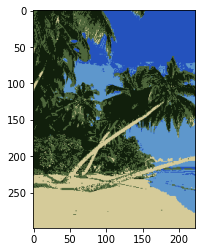

In [1595]:
plt.imshow(trainingOutputImage)

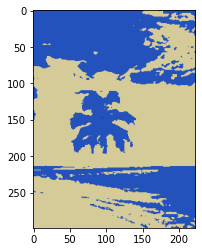

In [1596]:
plt.imshow(a)

In [1597]:
import skimage.io as skio
trainingInputImage = skio.imread(fname="trainingInputImage.jpg")

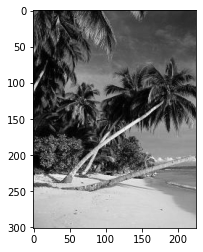

In [1598]:
plt.imshow(trainingInputImage,cmap=plt.cm.gray)

In [1599]:
trainingInputImage

array([[ 88,  99,  90, ...,  53,  53,  53],
       [110, 114,  93, ...,  51,  51,  52],
       [139, 107,  95, ...,  49,  48,  51],
       ...,
       [169, 171, 173, ..., 202, 201, 201],
       [164, 164, 166, ..., 202, 201, 203],
       [161, 158, 160, ..., 202, 201, 204]], dtype=uint8)

In [1600]:
trainImagePatchArray[0]

array([ 88.,  99.,  90., 110., 114.,  93., 139., 107.,  95.])

In [1601]:
trainingOutputImage[0,200]

array([ 36,  82, 189], dtype=uint8)

In [1602]:
trainingDataY

array([[0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0],
       ...,
       [0, 0, 0, 1, 0],
       [0, 0, 0, 0, 1],
       [0, 0, 1, 0, 0]])

In [1603]:
colors

array([[ 36,  82, 189],
       [ 17,  31,  12],
       [ 94, 151, 204],
       [ 78, 102,  59],
       [213, 203, 153]])